# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [2]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [3]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
#         return np.mean((X.dot(w) - y)**2)
        return np.linalg.norm(X.dot(w) - y)**2 / y.shape
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * X.T.dot(X.dot(w) - y) / y.shape
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

[27410283.5]
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [6]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    track = [w]
    for _ in range(n_iterations):
        w_grad = loss.calc_grad(X, y, w)
        w = w - lr * w_grad
        track.append(w.copy())
    return np.array(track)

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

[425.5891768]
[0.86706444]


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
#     plt.xlim(w_list[:, 0].min() - 0.1, 
#              w_list[:, 0].max() + 0.1)
#     plt.ylim(w_list[:, 1].min() - 0.1,
#              w_list[:, 1].max() + 0.1)
    plt.xlim(-1, 1)
    plt.ylim(-2, 2)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


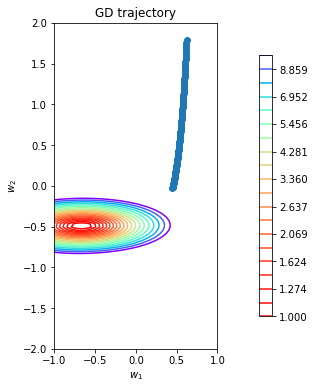

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


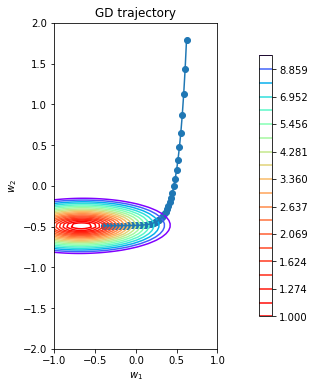

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


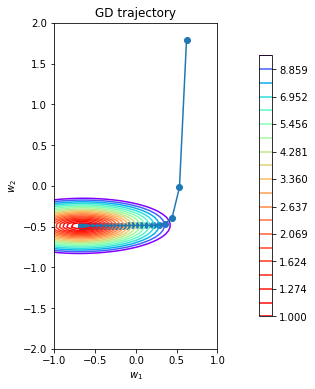

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


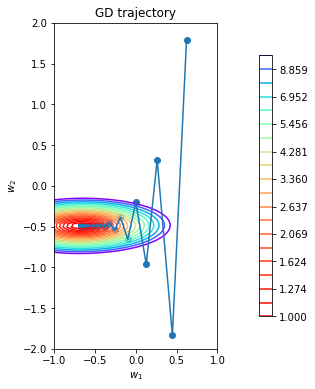

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


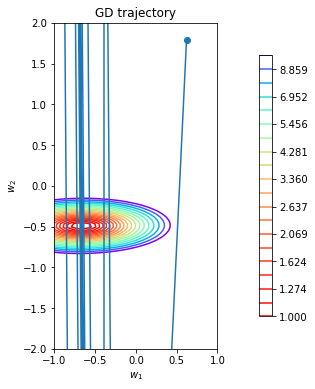

In [10]:
lrs = [0.0001, 0.001, 0.005, 0.01, 0.1]
for lr in lrs:
    w_list = gradient_descent(w_init, X, y, loss, lr, 100)
    plot_gd(w_list, X, y, loss)

Чем меньше параметр `lr`, т.е. величина шага, тем более точен градиентный спуск, но тем, очевидно, медленнее он работает и тем больше должно быть число итераций.
При слишком большом параметре `lr` получается, что мы просто проскакиваем локальный минимум из-за слишком большого шага.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    track = [w]
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_x = X[batch_indices]
        batch_y = y[batch_indices]
        w_grad = loss.calc_grad(batch_x, batch_y, w)
        w = w - lr * w_grad
        track.append(w.copy())
    return np.array(track)
        

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr: 0.0001
batch_size: 10


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


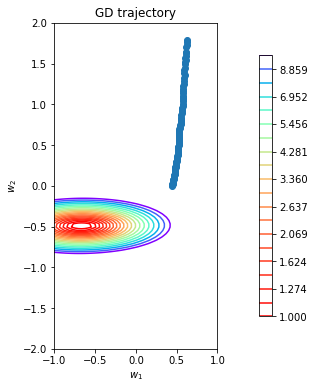

lr: 0.0001
batch_size: 50


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


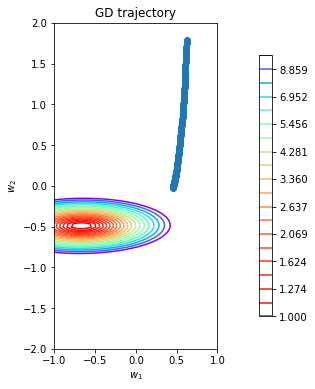

lr: 0.0001
batch_size: 100


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


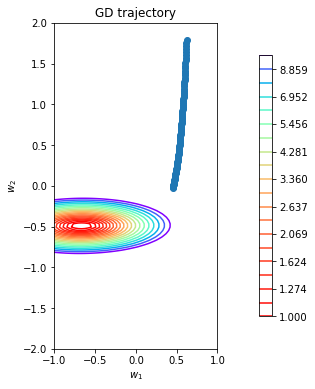

lr: 0.001
batch_size: 10


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


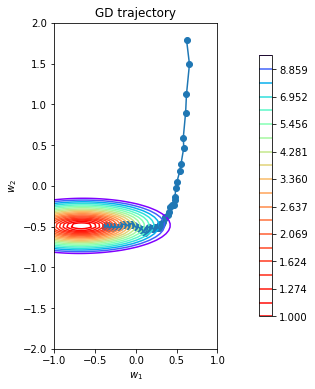

lr: 0.001
batch_size: 50


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


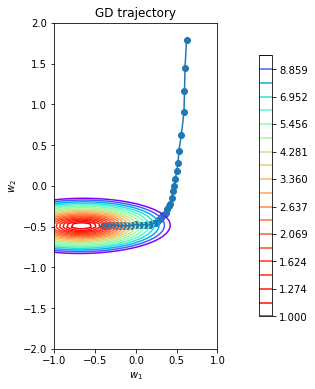

lr: 0.001
batch_size: 100


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


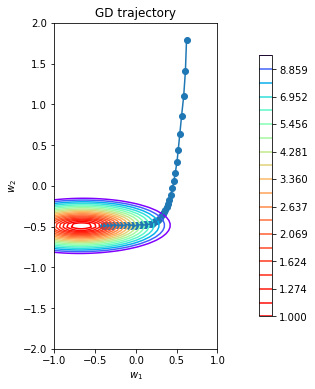

lr: 0.005
batch_size: 10


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


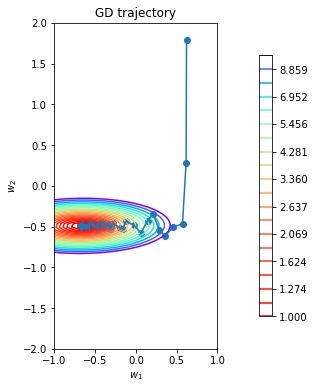

lr: 0.005
batch_size: 50


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


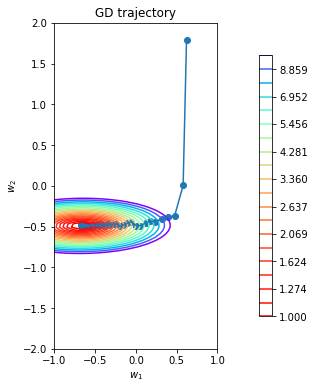

lr: 0.005
batch_size: 100


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


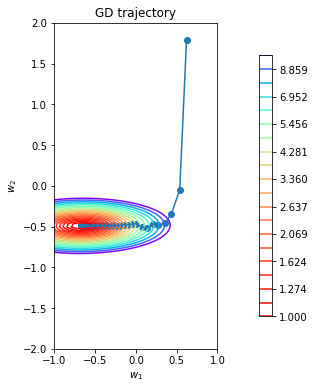

lr: 0.01
batch_size: 10


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


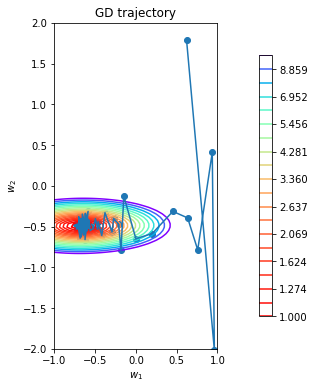

lr: 0.01
batch_size: 50


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


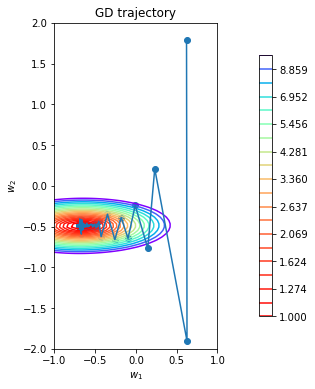

lr: 0.01
batch_size: 100


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


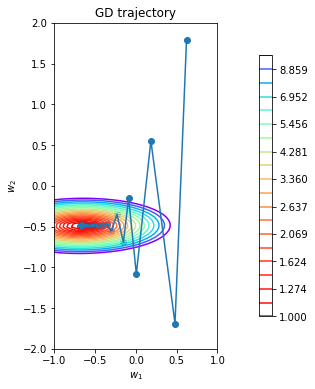

lr: 0.05
batch_size: 10


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


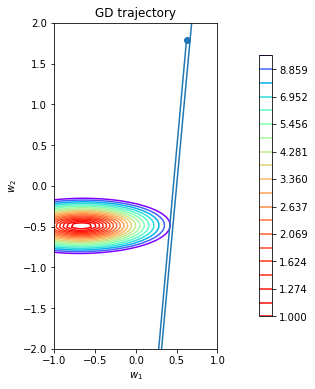

lr: 0.05
batch_size: 50


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


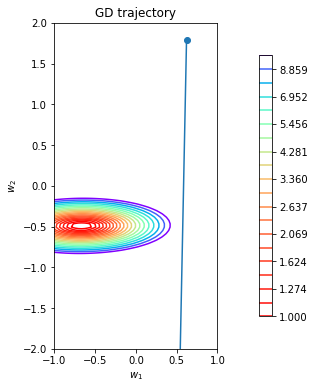

lr: 0.05
batch_size: 100


<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


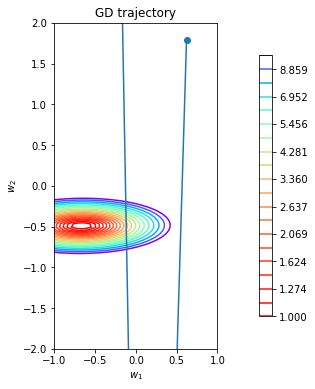

In [12]:
lrs = [0.0001, 0.001, 0.005, 0.01, 0.05]
batches = [10, 50, 100]
for lr in lrs:
    for batch in batches:
        print(f"lr: {lr}\nbatch_size: {batch}")
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch, 100)
        plot_gd(w_list, X, y, loss)

Очевидно, что чем больше `batch_size`, тем более точен SGD, но тем он медленнее, так как он постепенно превращается в обычный GD, ведь отличие лишь в том, что мы рассматриваем на каждом шаге не всю выборку, а лишь небольшой кусок. А чем меньше `batch_size`, тем более хаотично мы двигаемся. При слишком маленьком параметре `lr`, как и в случае с GD, оптимизация происходит очень медленно, так в моем примере за 100 итераций минимум просто не был найден. А при слишком большом минимум просто проскакивается. Соответственно, `batch_size` около 10 (учитываем, что всего выборка состоит из 300 строк) и `lr`=[0.005; 0.01] отлично подходят в нашем случае.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    track = [w]
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_x = X[batch_indices]
        batch_y = y[batch_indices]
        eta = lr * (1 / (1 + _))**p
        w_grad = loss.calc_grad(batch_x, batch_y, w)
        w = w - eta * w_grad
        track.append(w.copy())
    return np.array(track)

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


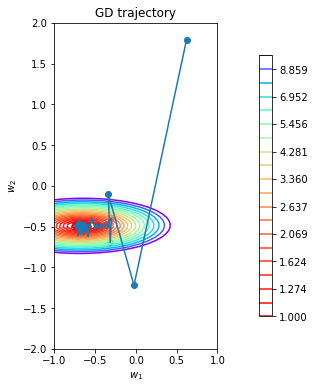

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


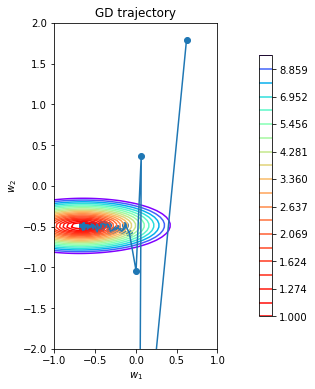

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


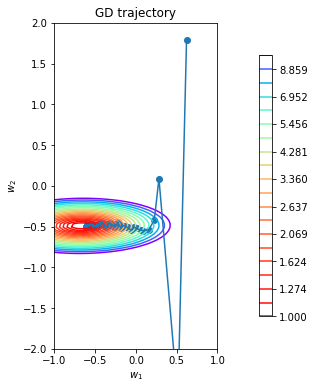

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


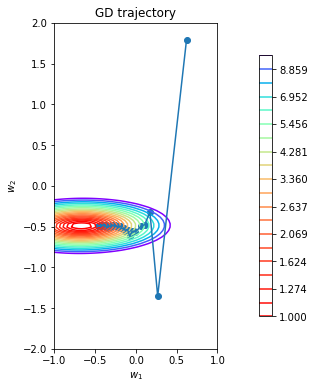

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


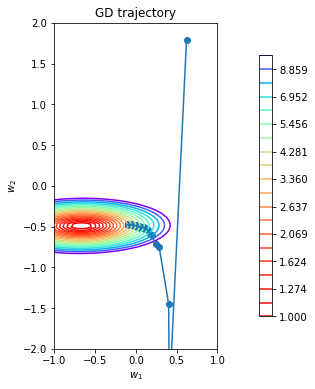

In [14]:
ps = [0.1, 0.3, 0.5, 0.7, 1]
lr = 0.01
batch_size = 10
for p in ps:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, 100)
    plot_gd(w_list, X, y, loss)

Чем больше параметр `p`, тем сильнее уменьшается шаг, следовательно работать SGD будет медленнее и понадобится большее число итераций. На графиках можно видеть, что при `p`=0.7 и `p`=1 минимум не был найден. При слишком же маленькой степени шаг спадает не так сильно, поэтому долго сохраняется большой шаг, из-за которого можно видеть слишком хаотичное поведение. Параметр `p`=0.3 оказался лучшим.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

(0.0, 50.0)

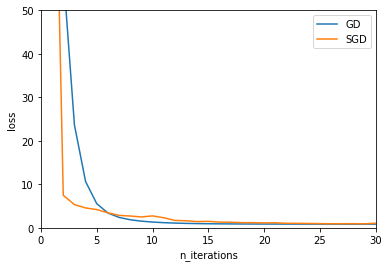

In [15]:
p = 0.3
batch_size = 10
iters = np.arange(101)
basic = [loss.calc_loss(X, y, w_curr) for w_curr in gradient_descent(w_init, X, y, loss, 0.01, 100)]
stoch = [loss.calc_loss(X, y, w_curr) for w_curr in stochastic_gradient_descent(w_init, X, y, loss, 0.01, batch_size, p, 100)]
plt.plot(iters, basic, iters, stoch)
plt.xlabel('n_iterations')
plt.ylabel('loss')
plt.legend(['GD', 'SGD'])
plt.xlim(0, 30)
plt.ylim(0, 50)

Видим, что в общем стохастическому градиентному спуску необходимо большее число итераций, чтобы достичь минимума нежели обычному (график SGD выше графика GD). Хотя в начале можем видеть, что SGD за меньшее число итераций оптимизировал веса. Но, мне кажется, что дело в самом датасете. Так, например, если выставить другой `seed`, то получим совсем другой результат. Так что это скорее случайность.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [16]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        w_list = gradient_descent(w_init, X, y, self.loss, 0.005, 10000)
        self.w = w_list[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y = X.dot(self.w)
        X = np.delete(X, -1, 1)
        return y

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [17]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [18]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"],
    index_col=0
)
X_raw = X_raw[~X_raw[25].isna()].reset_index()
# X_raw.drop(columns='index', inplace=True)
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [19]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
print(X_raw.shape)

(201, 25)


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [20]:
X_raw.isnull().any().any()

True

Есть пропуски.

In [21]:
X_raw.isnull().sum()

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

Разделим датасет на обучающую и тестовую выборку.

In [22]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)
print(X_train.shape, X_test.shape)

(140, 25) (61, 25)


Заполним пропуски в числовых признаках средними значениями.

In [23]:
from sklearn.impute import SimpleImputer

categorical_mask = (X_raw.dtypes == "object").values
# X_num = X_raw[X_raw.columns[~categorical_mask]]
X_train_num = X_train[X_train.columns[~categorical_mask]]
X_test_num = X_test[X_test.columns[~categorical_mask]]
# X_train_num = X_num.iloc[X_train.index]
# X_test_num = X_num.iloc[X_test.index]
replacer = SimpleImputer(strategy="mean")
X_train_num_filled = pd.DataFrame(data=replacer.fit_transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_num_filled = pd.DataFrame(data=replacer.transform(X_test_num), columns=X_test_num.columns, index=X_test_num.index)

print(X_train_num_filled.shape, X_test_num_filled.shape)
X_train_num_filled

(140, 15) (61, 15)


,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
149,0.0,77.000000,95.7,169.7,63.6,59.1,2280.0,92.0,3.05,3.03,9.0,62.000000,4800.000000,31.0,37.0
114,0.0,161.000000,108.0,186.7,68.3,56.0,3130.0,134.0,3.61,3.21,7.0,142.000000,5600.000000,18.0,24.0
184,2.0,94.000000,97.3,171.7,65.5,55.7,2300.0,109.0,3.19,3.40,10.0,100.000000,5500.000000,26.0,32.0
8,1.0,158.000000,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,8.3,140.000000,5500.000000,17.0,20.0
152,0.0,91.000000,95.7,166.3,64.4,53.0,2081.0,98.0,3.19,3.03,9.0,70.000000,4800.000000,30.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,2.0,121.000000,88.4,141.1,60.3,53.2,1488.0,61.0,2.91,3.03,9.5,48.000000,5100.000000,47.0,53.0
98,0.0,128.000000,100.4,181.7,66.5,55.1,3095.0,181.0,3.43,3.27,9.0,152.000000,5200.000000,17.0,22.0
66,0.0,93.000000,106.7,187.5,70.3,54.9,3495.0,183.0,3.58,3.64,21.5,123.000000,4350.000000,22.0,25.0
126,0.0,120.660714,96.1,181.5,66.5,55.2,2579.0,132.0,3.46,3.90,8.7,105.326087,5100.724638,23.0,31.0


Нормируем числовые признаки.

In [24]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
# X_train_filled_norm = normalizer.fit_transform(X_train_num_filled)
# X_test_filled_norm = normalizer.transform(X_test_num_filled)
X_train_filled_norm = pd.DataFrame(data=normalizer.fit_transform(X_train_num_filled), index=X_train_num_filled.index)
X_test_filled_norm = pd.DataFrame(data=normalizer.transform(X_test_num_filled), index=X_test_num_filled.index)

print(X_train_filled_norm.shape, X_test_filled_norm.shape)
X_train_filled_norm

(140, 15) (61, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
149,-0.679957,-1.437905,-0.507643,-0.400154,-1.083188,2.084984,-0.571860,-0.872718,-1.090524,-0.762702,-0.341510,-1.076563e+00,-0.628619,0.870263,0.878116
114,-0.679957,1.328519,1.408537,0.920926,1.021767,0.835663,0.974023,0.083240,1.064864,-0.175608,-0.803880,9.112705e-01,1.043658,-1.070764,-0.948366
184,0.961319,-0.878034,-0.258384,-0.244733,-0.232249,0.714761,-0.535486,-0.485783,-0.551677,0.444102,-0.110325,-1.323422e-01,0.834624,0.123714,0.175623
8,0.140681,1.229718,1.065805,1.387189,2.410142,0.795363,0.894001,0.014957,-0.782611,0.444102,-0.503339,8.615747e-01,0.834624,-1.220074,-1.510360
152,-0.679957,-0.976835,-0.507643,-0.664370,-0.724898,-0.373357,-0.933778,-0.736153,-0.551677,-0.762702,-0.341510,-8.777798e-01,-0.628619,0.720953,0.878116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.961319,0.011174,-1.644888,-2.622676,-2.561136,-0.292756,-2.012259,-1.578306,-1.629371,-0.762702,-0.225917,-1.424434e+00,-0.001515,3.259218,3.126094
98,-0.679957,0.241709,0.224556,0.532373,0.215614,0.472957,0.910369,1.153003,0.372061,0.020090,-0.341510,1.159750e+00,0.207520,-1.220074,-1.229363
66,-0.679957,-0.910967,1.206014,0.983094,1.917493,0.392356,1.637844,1.198524,0.949397,1.226894,2.548302,4.391600e-01,-1.569275,-0.473525,-0.807867
126,-0.679957,0.000000,-0.445328,0.516831,0.215614,0.513258,-0.028073,0.037718,0.487528,2.074918,-0.410865,-3.531102e-16,0.000000,-0.324215,0.035125


Заполняем пропуски в категорилальных признаках и кодируем категориальные признаки.

In [25]:
# X_cat = X_raw[X_raw.columns[categorical_mask]].fillna('backfill')
X_cat = X_raw[X_raw.columns[categorical_mask]].fillna("")
X_cat_coded = pd.get_dummies(X_cat, drop_first=True)
X_train_coded = X_cat_coded.iloc[X_train.index]
X_test_coded = X_cat_coded.iloc[X_test.index]
print(X_train_coded.shape, X_test_coded.shape)
X_train_coded

(140, 50) (61, 50)


,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
66,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Объединяем обратно числовые и категориальные признаки.

In [26]:
X_train = pd.concat([X_train_filled_norm, X_train_coded], axis=1)
X_test = pd.concat([X_test_filled_norm, X_test_coded], axis=1)
print(X_train.shape, X_test.shape)

(140, 65) (61, 65)


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [27]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [28]:
from sklearn.metrics import mean_squared_error
train_loss = mean_squared_error(y_train, linear_regression.predict(X_train))
test_loss = mean_squared_error(y_test, linear_regression.predict(X_test))
print(train_loss)
print(test_loss)

2428434.9907138133
6255929.778361297


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [29]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.linalg.norm(X.dot(w) - y)**2 / y.shape + self.coef * np.linalg.norm(w[:-1])**2
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_reg = w.copy()
        w_reg[-1] = 0
        return 2 * X.T.dot(X.dot(w) - y) / y.shape + 2 * self.coef * w_reg
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [30]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [31]:
coefs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
min_loss_test = 1e+08
for coef in coefs:
    linear_regression = LinearRegression(MSEL2Loss(coef))
    linear_regression.fit(X_train, y_train)
    print('lambda=', coef)
    train_loss_reg = mean_squared_error(y_train, linear_regression.predict(X_train))
    test_loss_reg = mean_squared_error(y_test, linear_regression.predict(X_test))
    print(train_loss_reg)
    print(test_loss_reg)
    if test_loss_reg <= min_loss_test:
        min_loss_test = test_loss_reg
        min_loss_train = train_loss_reg

lambda= 0.001
2481709.8031823765
6255519.6134520145
lambda= 0.005
2701666.5492305583
6285987.25264054
lambda= 0.01
2974228.957205382
6364346.317868479
lambda= 0.05
4516809.048002391
6987192.557151091
lambda= 0.1
5683551.254536925
7488659.142299139
lambda= 0.5
10230877.13823373
9586928.397062642
lambda= 1
13085085.29962339
10807239.3536533


$\lambda$=0.001 дает наименьшую ошибку на тестовой выборке.

In [32]:
print("MSELoss train: ", train_loss)
print("MSELoss test: ", test_loss)

print("MSEL2Loss train: ", min_loss_train)
print("MSEL2Loss test: ", min_loss_test)

MSELoss train:  2428434.9907138133
MSELoss test:  6255929.778361297
MSEL2Loss train:  2481709.8031823765
MSEL2Loss test:  6255519.6134520145


Как можно видеть, теперь переобучение проявляется не так сильно. Ошибка на обучающей выборке выросла, зато на тестовой уменьшилась.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [33]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        args = X.dot(w) - y
        phi = np.vectorize(lambda z: 0.5 * z**2 if np.abs(z) < self.eps else self.eps * (np.abs(z) - 0.5 * self.eps))
        phi_res = phi(args)
#         phi = np.apply_along_axis(lambda z: 0.5 * z**2 if np.abs(z) < self.eps else self.eps * (np.abs(z) - 0.5 * self.eps), 0, args)
        loss = sum(phi_res) / y.shape
        return loss
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        args = (X.dot(w) - y).reshape(1, -1)
        phi = np.vectorize(lambda z: z if np.abs(z) < self.eps else self.eps * np.sign(z))
        phi_res = phi(args)
#         phi_res = phi_res.reshape(1, -1)
#         phi = np.apply_along_axis(lambda z: z if np.abs(z) < self.eps else self.eps * np.sign(z), 0, args)
        grad = sum(phi_res.dot(X)) / y.shape
        return grad
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [34]:
print("MSELoss train: ", train_loss)
print("MSELoss test: ", test_loss)

linear_regression = LinearRegression(HuberLoss(4400))
linear_regression.fit(X_train, y_train)
huber_train_loss =  mean_squared_error(y_train, linear_regression.predict(X_train))
huber_test_loss = mean_squared_error(y_test, linear_regression.predict(X_test))
print("HuberLoss train: ", huber_train_loss)
print("HuberLoss test: ", huber_test_loss)

MSELoss train:  2428434.9907138133
MSELoss test:  6255929.778361297
HuberLoss train:  3341122.6125227874
HuberLoss test:  6670113.580087399


Huber Loss плохо справился со своей задачей. Мне кажется, что дело все-таки в линейной зависимости признаков друг от друга.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

### БОНУС (2.5 баллов)

**Когда проверяли ДЗ меньше месяца**

In [41]:
%%HTML
<b>Когда ДЗ проверили меньше, чем за месяц (ноу оффенс)</b>
<br><iframe width="560" height="315" src="https://www.youtube.com/embed/A0vWkbZhPV4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"></iframe>

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регрессии в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [36]:
def simulated_annealing(w_init, X, y, loss, t_init: float = 10., t_end: float = 0.00001):
    w_curr = w_init
    loss_curr = loss.calc_loss(X, y, w_curr)
    i = 0
    t = t_init
    track = [w_curr]
    while t > t_end:
        i += 1
        w_new = w_curr + np.random.standard_t(3.5, size=w_curr.shape)
        loss_new = loss.calc_loss(X, y, w_new)
        delta = loss_new - loss_curr
        if (delta < 0) or (math.exp(-delta / t) >= random.random()):
            w_curr = w_new
            loss_curr = loss_new
            track.append(w_curr)
        t = t_init / (1 + i)
    return track

In [37]:
import math
import random
class LinearRegresionSimulAnnealing:
    def __init__(self, loss: BaseLoss):
        self.loss = loss
    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y = X.dot(self.w)
        X = np.delete(X, -1, 1)
        return y  
    def fit(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        self.w = simulated_annealing(w_init, X, y, self.loss)[-1]
        return self

In [38]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


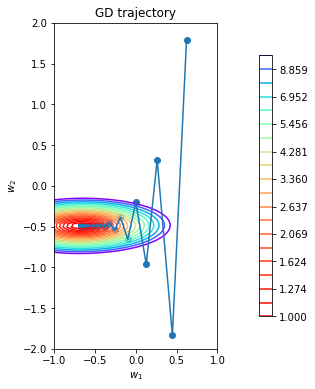

<ipython-input-9-0ff4276f2a49>:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


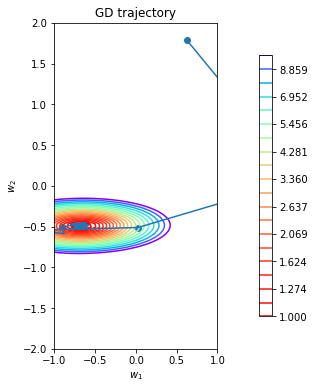

In [39]:
loss = MSELoss()
w_list_gd = gradient_descent(w_init, X, y, loss, 0.01, 1000)
w_list_sa = simulated_annealing(w_init, X, y, loss)
plot_gd(w_list_gd, X, y, loss)
plot_gd(w_list_sa, X, y, loss)

In [40]:
lin_reg_gd = LinearRegression(loss)
lin_reg_sa = LinearRegresionSimulAnnealing(loss)
lin_reg_gd.fit(X, y)
print("Loss GD: ", mean_squared_error(y, lin_reg_gd.predict(X)))
lin_reg_sa.fit(X, y)
print("Loss SA: ", mean_squared_error(y, lin_reg_sa.predict(X)))

Loss GD:  0.8670635420046593
Loss SA:  0.8707000077687527


Видим, что алгоритм имитации отжига хорошо справляется с задачей оптимизации, как и градиентный спуск. Так же можно заметить, что имитация отжига больше похожа на стохастический градиентный спуск по своей траектории, она более хаотичная, чем обычный градиентный спуск.